In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

In [201]:
df=pd.read_csv('concrete_data.csv')

In [202]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [203]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [205]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [206]:
df.shape

(1030, 9)

In [207]:
x=df.drop(columns=['Strength'])
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [208]:
y_train.shape

(721,)

In [209]:
x_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
196,194.7,0.0,100.5,165.6,7.5,1006.4,905.9,28
631,325.0,0.0,0.0,184.0,0.0,1063.0,783.0,7
81,318.8,212.5,0.0,155.7,14.3,852.1,880.4,3
526,359.0,19.0,141.0,154.0,10.9,942.0,801.0,3
830,162.0,190.0,148.0,179.0,19.0,838.0,741.0,28


In [210]:
y_train.head()

196    25.72
631    17.54
81     25.20
526    23.64
830    33.76
Name: Strength, dtype: float64

In [211]:
lr=LinearRegression()

In [212]:
lr.fit(x_train,y_train)

LinearRegression()

In [213]:
y_pred=lr.predict(x_test)

In [214]:
y_pred

array([58.57559825, 52.45646315, 64.11894482, 52.00069556, 17.52416752,
       39.59237788, 26.65525924, 45.05182266, 30.0607746 , 37.56903968,
       27.90132545, 19.09017187, 68.0649994 , 52.75884153, 30.01094902,
       44.31367221, 29.17966162, 26.34627447, 32.16097688, 32.35848511,
       36.66341834, 31.60412862, 38.56312792, 25.05633822, 32.8134936 ,
       34.5774219 , 14.60054941, 40.05425989, 41.87492005, 21.03099827,
       35.29735411, 30.504642  , 43.38895117, 45.46161023, 31.11357345,
       29.08456081, 29.48841545, 38.62461077, 20.42793578, 38.7197513 ,
       21.28819958, 16.10817911, 31.15578325, 51.47669894, 20.87486449,
       57.93741262, 51.05519306, 59.75306328, 20.17206098, 19.32216244,
       40.38198993, 35.77907885, 29.86317187, 33.48220014, 46.53873549,
       51.89849202, 28.46558802, 15.78715013, 30.13328038, 18.20703499,
       38.37844006, 19.57892812, 31.92722861, 56.12294516, 22.88347876,
       21.32190153, 32.44785729, 16.79648193, 26.12833023, 26.10

In [215]:
from sklearn.metrics import r2_score
print("Accuracy Store is:",r2_score(y_test,y_pred))

Accuracy Store is: 0.5943782479239206


C:\Users\naman\AppData\Local\Temp\ipykernel_2848\2092950731.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


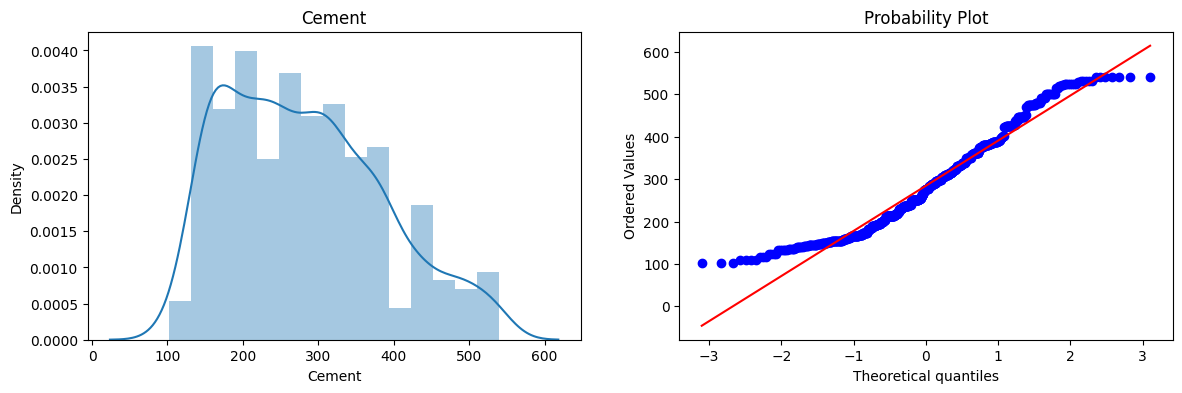

C:\Users\naman\AppData\Local\Temp\ipykernel_2848\2092950731.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


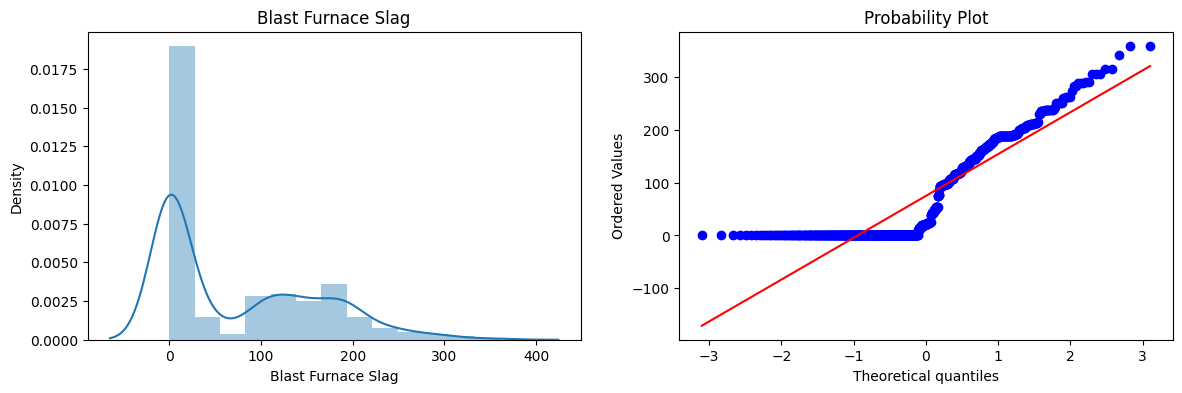

C:\Users\naman\AppData\Local\Temp\ipykernel_2848\2092950731.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


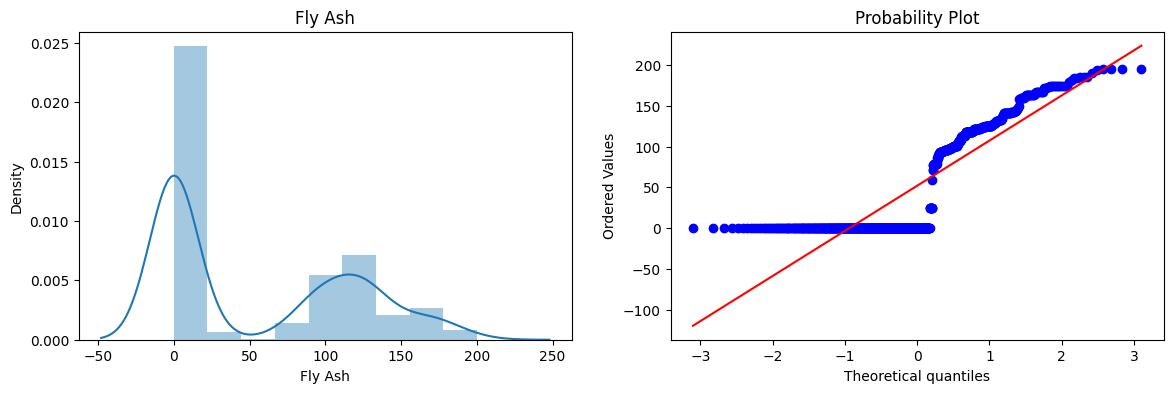

C:\Users\naman\AppData\Local\Temp\ipykernel_2848\2092950731.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


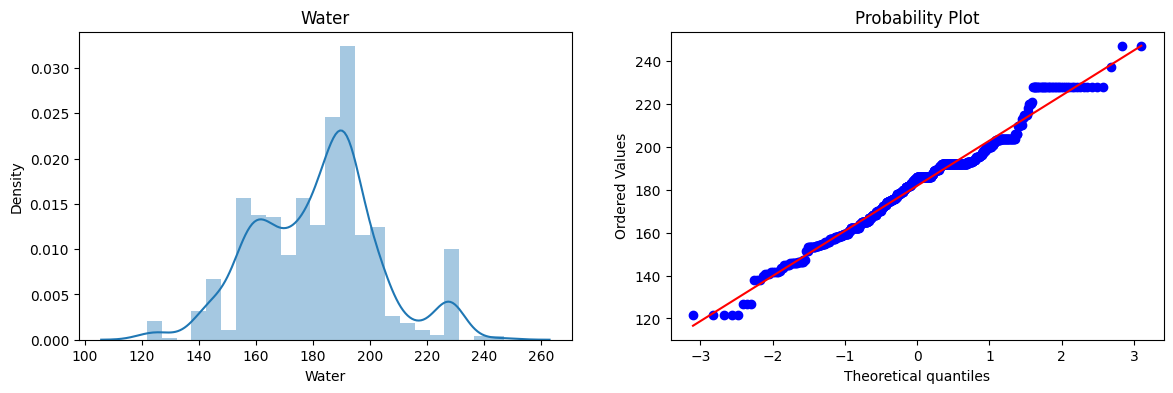

C:\Users\naman\AppData\Local\Temp\ipykernel_2848\2092950731.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


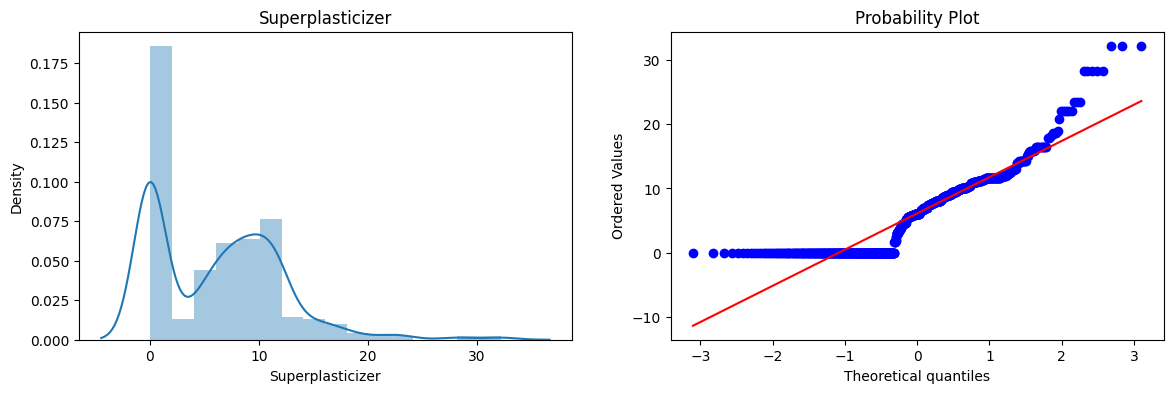

C:\Users\naman\AppData\Local\Temp\ipykernel_2848\2092950731.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


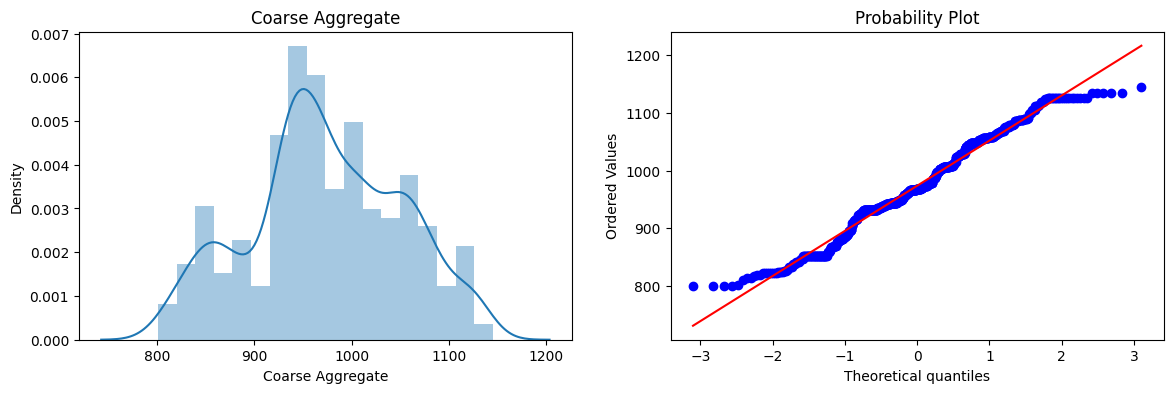

C:\Users\naman\AppData\Local\Temp\ipykernel_2848\2092950731.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


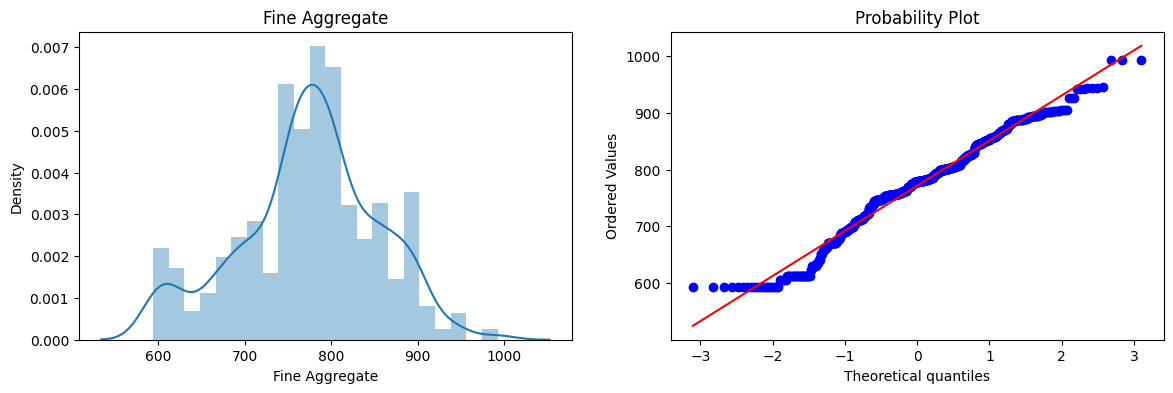

C:\Users\naman\AppData\Local\Temp\ipykernel_2848\2092950731.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


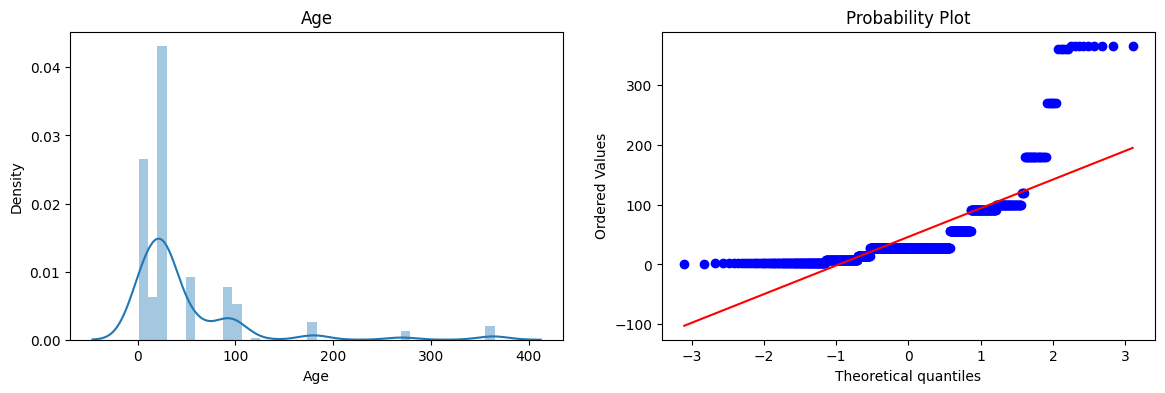

In [216]:
for columns in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[columns])
    plt.title(columns)
    plt.subplot(122)
    stats.probplot(x_train[columns],dist='norm',plot=plt)
    plt.show()

In [217]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='box-cox')

In [218]:
x_train_transformed=pt.fit_transform(x_train+0.000001)
x_test_transformed=pt.transform(x_test+0.000001)
pd.DataFrame({'cols':x_train.columns,'box_col_lambdas':pt.lambdas_})

,cols,box_col_lambdas
0,Cement,0.193476
1,Blast Furnace Slag,0.025753
2,Fly Ash,-0.045060
3,Water,0.853461
4,Superplasticizer,0.093053
5,Coarse Aggregate,1.040260
6,Fine Aggregate,1.890557
7,Age,0.071532


In [219]:
lr1=LinearRegression()
lr1.fit(x_train_transformed,y_train)
y_pred2=lr1.predict(x_test_transformed)
print("r2 Score After Transforming is:",r2_score(y_test,y_pred2))

r2 Score After Transforming is: 0.7907293130754918


In [220]:
from sklearn.model_selection import cross_val_score

In [221]:
np.mean(cross_val_score(lr1,x_train_transformed,y_pred2,scoring='r2'))

ValueError: Found input variables with inconsistent numbers of samples: [721, 309]

C:\Users\naman\AppData\Local\Temp\ipykernel_2848\1384284939.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[columns])


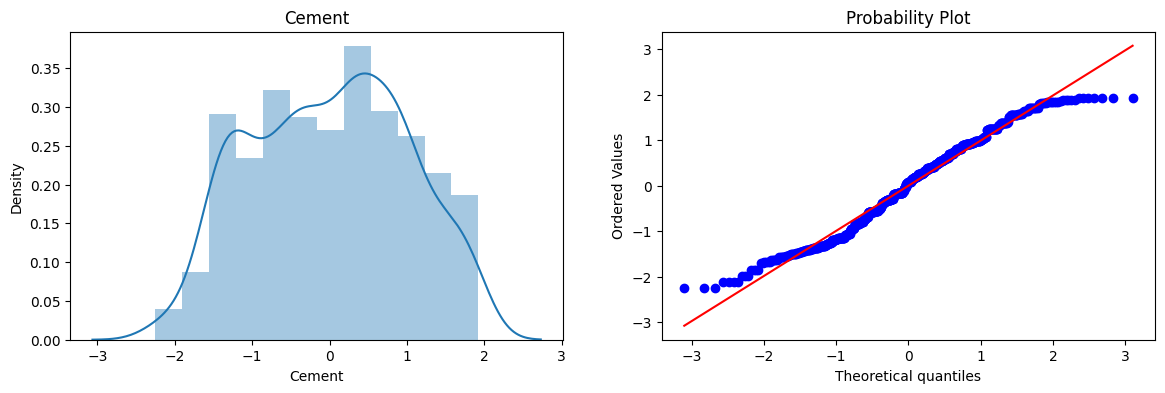

C:\Users\naman\AppData\Local\Temp\ipykernel_2848\1384284939.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[columns])


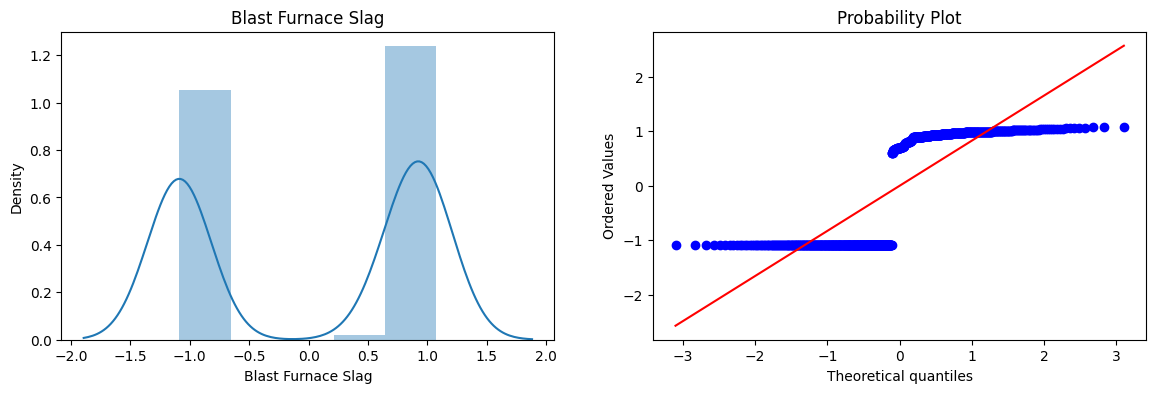

C:\Users\naman\AppData\Local\Temp\ipykernel_2848\1384284939.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[columns])


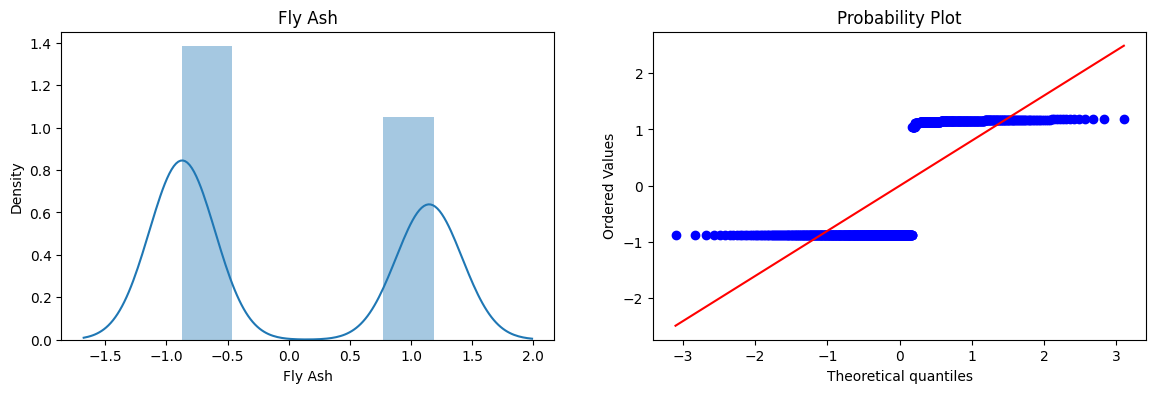

C:\Users\naman\AppData\Local\Temp\ipykernel_2848\1384284939.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[columns])


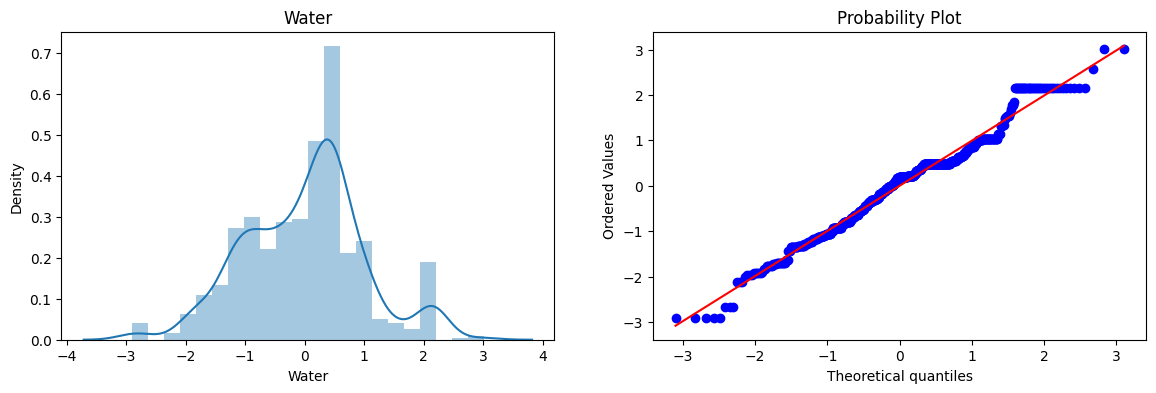

C:\Users\naman\AppData\Local\Temp\ipykernel_2848\1384284939.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[columns])


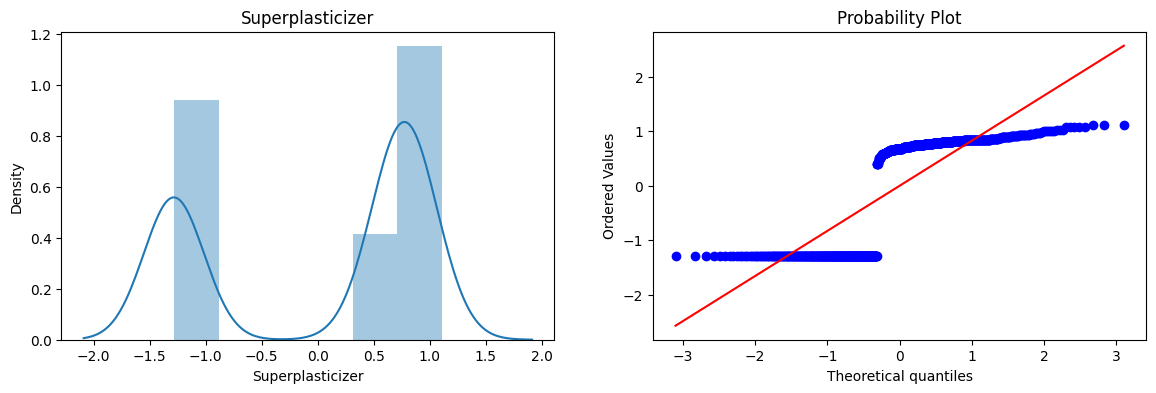

C:\Users\naman\AppData\Local\Temp\ipykernel_2848\1384284939.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[columns])


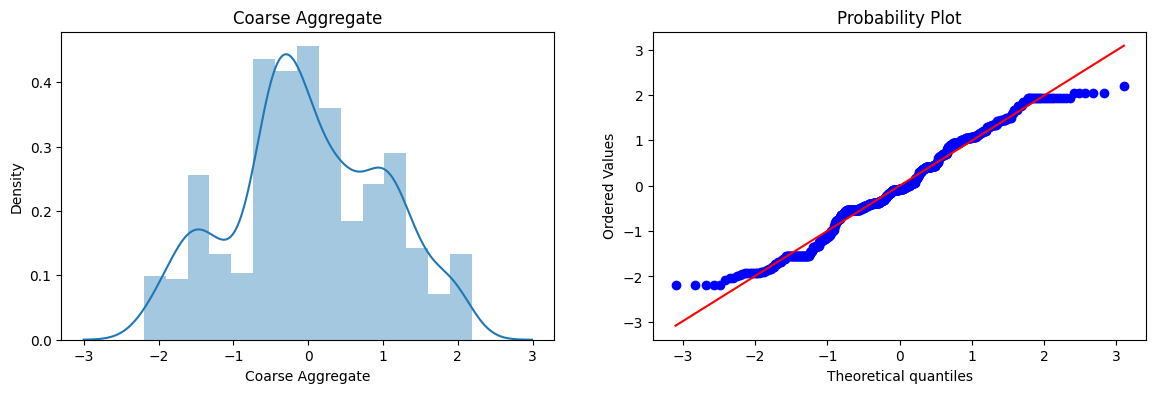

C:\Users\naman\AppData\Local\Temp\ipykernel_2848\1384284939.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[columns])


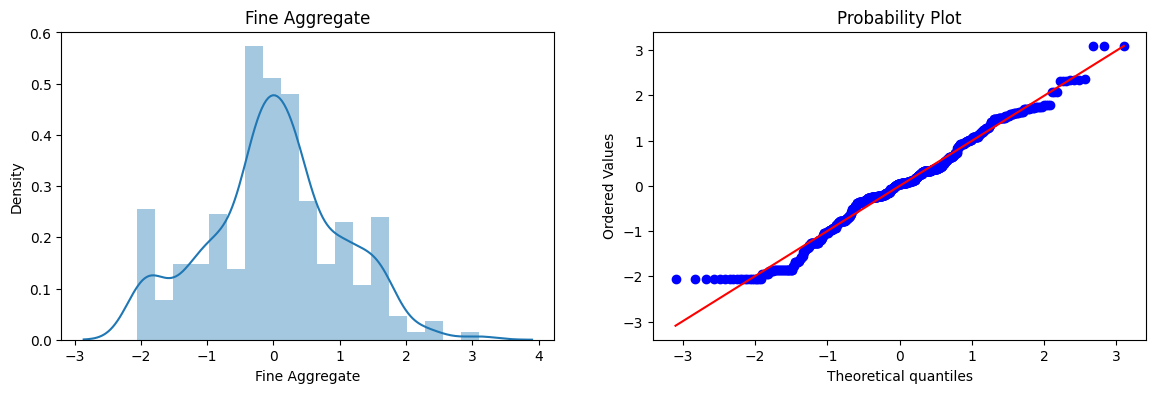

C:\Users\naman\AppData\Local\Temp\ipykernel_2848\1384284939.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[columns])


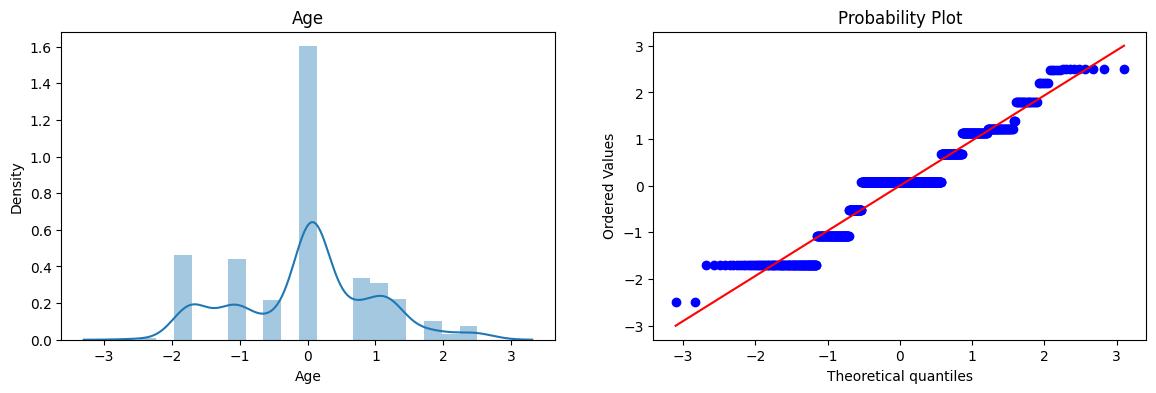

In [228]:
x_train_transformed=pd.DataFrame(x_train_transformed,columns=x_train.columns)

for columns in x_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train_transformed[columns])
    plt.title(columns)
    plt.subplot(122)
    stats.probplot(x_train_transformed[columns],dist='norm',plot=plt)
    plt.show()